# **Trabajo de redes bayesianas**
# *liberia bnlearn*
El objetivo: 
* Cargar dataFrame
* Aplicar analisis de dato y refinamiento de esta
* Lectura de estrcutra DAG
* Lectura y entrenamiento de parametros DAG
* Aplicacion de inferancia.

# *Cargar DataFrame*
Realizando carga de dataFrame, ademas de aprobechar de generar un espacio para cargar las liberias y funciones entre otras.

In [2]:
import bnlearn as bn
import numpy as np
import matplotlib.pyplot as plt # gráficos y visualizaciones
import seaborn as sns # plt + estadisticas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions


../resources/dataset_a_2021v2.xlsx
../resources/dataset_a_2021v3.xlsx
../resources/dataset_a_2021v4.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


# *Analisis de datos y Refinamiento de esta*

Podemos observar que el dataFrame existesten una gran variedad de columnas:

+ Columna `envios`, es la cintadad de envios realizados de la guia.
+ Columna `fallidos`: cuantas intetos fallidos tuvo al enviar la guia.
+ Columna `exitosos`: cuantas fueron exitosas.
+ Columna `e0` hasta la columna `e52`: son las preguntas de la guias utilizada para apoyar el curso en donde se puede indicar que la columna fue correctamente resuelta con un 1 y no resuelta con 0, tambien podemos indicar que no todas las preguntas de ejercicios son obligatorias, pero si podemos indicar que son una ayuda indicativa sobre posible abandono del curso. 
+ Columna `Programa`: el curso introduccion a la computacion interactua con distintas carreras como por ejemplo, ingenieria civil, industrial, entre otras, en resumen podemos indicar que la columna programa, es la carrera asociada al curso de introduccion a la computacion. 
+ Columna `sol1`: es la nota obtenida en la primera prueba del semestre con la nota de 1 a 7.

In [3]:
#df = pd.read_csv('../resources/dataset_unab_ORIGINAL SIN P1.csv')
#df = pd.read_csv('../resources/dataset_unab_P1.csv')
# df = pd.read_excel(open('../resources/dataset_a_2021v2.xlsx','rb'))
df = pd.read_excel(open('../resources/dataset_a_2021v3.xlsx','rb'))

df.head()

,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,e6,...,e45,e46,e47,e48,e49,e50,e51,e52,programa,sol1
0,10,21,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
1,7,9,16,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
2,6,10,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22510,1.0


En vista que la columna `sol1 esta representada por notas del 1.0 hasta el 7.0`, se crea funcion que permita tomar la nota y `crear una nueva columna en el dataFrame llamada aprobado`, donde: 
+ Si la nota es menor a 4, se `reprueba` y este se representada con un CERO (0).
+ Si la nota es mayor a 4, se `aprueba` y este se representa con un UNO (1).

In [4]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['exitosos', 'fallidos', 'envios', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5',
       'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16',
       'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26',
       'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36',
       'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46',
       'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'programa', 'sol1',
       'aprobado'],
      dtype='object')


# *Realizando analisis varios*
Inicialmente comenzamos por saber cuanta representacion de aprobados y reporbados enxisten en todo el dataFrame

Text(0.5, 1.0, 'Aprobados/Reprobados Solemne 1 del dataset')

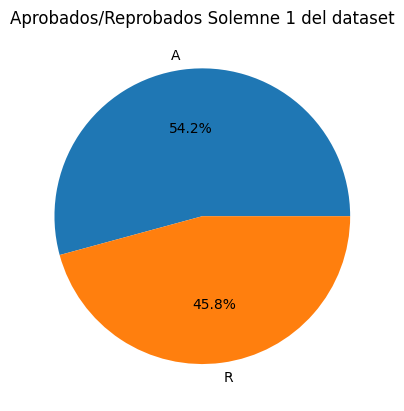

In [5]:
plt.pie(df['aprobado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Aprobados/Reprobados Solemne 1 del dataset')

Buscamos y generamos una tabla resumen de Programa, Cantidad en el programa, Aprobados, Porcentaje de Aprobados, Reprobados y Porcentaje de Reprobados  

In [6]:
# Crear un diccionario con las columnas del dataframe
data = {'Programa': [], 'Cantidad': [], 'Aprobados': [], 'Porcentaje Aprobados': [], 'Reprobados': [], 'Porcentaje Reprobados': []}

# Iterar sobre los programas únicos en el dataframe
for programa in df['programa'].unique():
    # Contar la cantidad de alumnos en el programa, la cantidad de aprobados y la cantidad de reprobados
    cantidad_total = len(df[df['programa'] == programa])
    cantidad_aprobados = len(df[(df['programa'] == programa) & (df['aprobado'] == 1)])
    cantidad_reprobados = cantidad_total - cantidad_aprobados
    
    # Calcular el porcentaje de aprobados y reprobados
    porcentaje_aprobados = (cantidad_aprobados / cantidad_total) * 100
    porcentaje_reprobados = (cantidad_reprobados / cantidad_total) * 100
    
    # Agregar los valores al diccionario
    data['Programa'].append(programa)
    data['Cantidad'].append(cantidad_total)
    data['Aprobados'].append(f"{cantidad_aprobados}")
    data['Porcentaje Aprobados'].append(f"{porcentaje_aprobados:.2f}%")
    data['Reprobados'].append(cantidad_reprobados)
    data['Porcentaje Reprobados'].append(f"{porcentaje_reprobados:.2f}%")

# Crear el dataframe a partir del diccionario
df_tabla = pd.DataFrame(data)

# Ordenar el dataframe por la columna 'Cantidad' de mayor a menor
df_tabla = df_tabla.sort_values('Cantidad', ascending=False)

# Imprimir la tabla formateada
print(df_tabla.to_string(index=False))

 Programa  Cantidad Aprobados Porcentaje Aprobados  Reprobados Porcentaje Reprobados
UNAB12100       213        61               28.64%         152                71.36%
UNAB11500       185        81               43.78%         104                56.22%
UNAB12210       180       118               65.56%          62                34.44%
UNAB22115        94        41               43.62%          53                56.38%
UNAB21500        42        16               38.10%          26                61.90%
UNAB22100        41        24               58.54%          17                41.46%
UNAB22510        32        11               34.38%          21                65.62%
UNAB12510        30        18               60.00%          12                40.00%
UNAB21503        16        12               75.00%           4                25.00%
UNAB18000         2         0                0.00%           2               100.00%
UNAB22505         1         0                0.00%           1   

Creamos un grafico representativo de la tabla

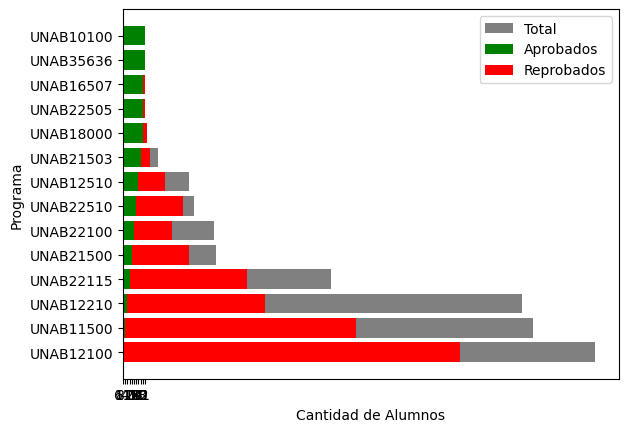

In [7]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Configurar el eje y los datos para el gráfico de barras
y = df_tabla['Programa']
cantidad = df_tabla['Cantidad']
aprobados = df_tabla['Aprobados']
reprobados = df_tabla['Reprobados']

# Crear los gráficos de barras
ax.barh(y, cantidad, label='Total', color='grey')
ax.barh(y, aprobados, label='Aprobados', color='green')
ax.barh(y, reprobados, label='Reprobados', color='red', left=aprobados)

# Configurar el eje y la leyenda
ax.set_xlabel('Cantidad de Alumnos')
ax.set_ylabel('Programa')
ax.legend()

# Mostrar el gráfico
plt.show()

Visualizando la relacion que tienen las `preguntas resueltas` de la guia para la `solemne 1` en los `envios`, cuantos intentos `fallidos` y cuantos `exitosos` tuvieron los `aprobados`.

In [8]:
# Filtrar los datos para incluir solo los alumnos aprobados
aprobados = df[df['aprobado'] == 1]
envios_aprobados = aprobados['envios'].sum()
fallidos_aprobados = aprobados['fallidos'].sum()
exitosos_aprobados = aprobados['exitosos'].sum()

# Contar la cantidad de veces que cada pregunta fue respondida correctamente por los alumnos aprobados
preguntas_correctas = aprobados.loc[:, 'e0':'e52'].sum()

# Imprimir los resultados
print("Preguntas respondidas correctamente por los alumnos aprobados:")
print(preguntas_correctas)
print("Cantidad de envíos de los alumnos aprobados:", envios_aprobados)
print("Cantidad de intentos fallidos de los alumnos aprobados:", fallidos_aprobados)
print("Cantidad de éxitos de los alumnos aprobados:", exitosos_aprobados)

Preguntas respondidas correctamente por los alumnos aprobados:
e0     261
e1       5
e2       0
e3     198
e4     331
e5       0
e6       4
e7     116
e8       0
e9       1
e10    248
e11      1
e12      3
e13    113
e14      0
e15      0
e16      0
e17    335
e18    133
e19      0
e20      0
e21      2
e22    285
e23    267
e24      0
e25    329
e26    296
e27      0
e28      3
e29    292
e30      0
e31      0
e32    132
e33      0
e34      0
e35    122
e36      0
e37      3
e38      3
e39      0
e40      0
e41      0
e42    158
e43      0
e44      4
e45      0
e46      0
e47      0
e48      0
e49      0
e50      0
e51      0
e52      0
dtype: int64
Cantidad de envíos de los alumnos aprobados: 8249
Cantidad de intentos fallidos de los alumnos aprobados: 4583
Cantidad de éxitos de los alumnos aprobados: 3666


Visualizando la relacion que tienen las `preguntas resueltas` de la guia para la `solemne 1` en los `envios`, cuantos intentos `fallidos` y cuantos `exitosos` tuvieron los `reprobados`.

In [9]:
# Filtrar los datos para incluir solo los alumnos aprobados
reprobados = df[df['aprobado'] == 0]
envios_reprobados = reprobados['envios'].sum()
fallidos_reprobados = reprobados['fallidos'].sum()
exitosos_reprobados = reprobados['exitosos'].sum()

# Contar la cantidad de veces que cada pregunta fue respondida correctamente por los alumnos aprobados
preguntas_correctas = reprobados.loc[:, 'e0':'e52'].sum()

# Imprimir los resultados
print("Preguntas respondidas correctamente por los alumnos reprobados:")
print(preguntas_correctas)
print("Cantidad de envíos de los alumnos reprobados:", envios_reprobados)
print("Cantidad de intentos fallidos de los alumnos reprobados:", fallidos_reprobados)
print("Cantidad de éxitos de los alumnos reprobados:", exitosos_reprobados)

Preguntas respondidas correctamente por los alumnos reprobados:
e0     163
e1       3
e2       0
e3      98
e4     285
e5       0
e6       6
e7      56
e8       0
e9       1
e10    162
e11      1
e12      2
e13     66
e14      0
e15      0
e16      0
e17    297
e18     83
e19      0
e20      0
e21      1
e22    214
e23    196
e24      0
e25    291
e26    227
e27      0
e28      3
e29    198
e30      0
e31      0
e32     88
e33      0
e34      0
e35     74
e36      0
e37      2
e38      1
e39      0
e40      0
e41      0
e42     70
e43      0
e44      5
e45      0
e46      0
e47      0
e48      0
e49      0
e50      0
e51      0
e52      0
dtype: int64
Cantidad de envíos de los alumnos reprobados: 7503
Cantidad de intentos fallidos de los alumnos reprobados: 4887
Cantidad de éxitos de los alumnos reprobados: 2607


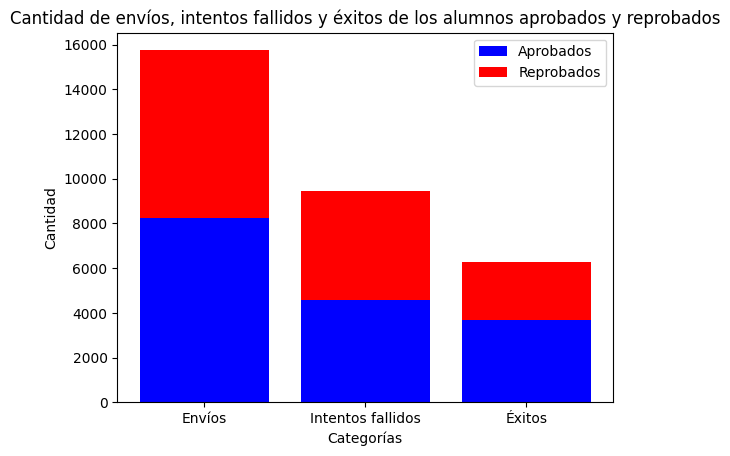

In [10]:
# Creamos un gráfico de barras para mostrar la cantidad de envíos, intentos fallidos y éxitos de los alumnos aprobados y reprobados
categorias = ['Envíos', 'Intentos fallidos', 'Éxitos']
aprobados_valores = [envios_aprobados, fallidos_aprobados, exitosos_aprobados]
reprobados_valores = [envios_reprobados, fallidos_reprobados, exitosos_reprobados]

plt.bar(categorias, aprobados_valores, color='blue', label='Aprobados')
plt.bar(categorias, reprobados_valores, color='red', label='Reprobados', bottom=aprobados_valores)

plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Cantidad de envíos, intentos fallidos y éxitos de los alumnos aprobados y reprobados')

plt.legend()
plt.show()

Generando grafico de los reprobados y sus columnas respondidas junto con la cantidad.

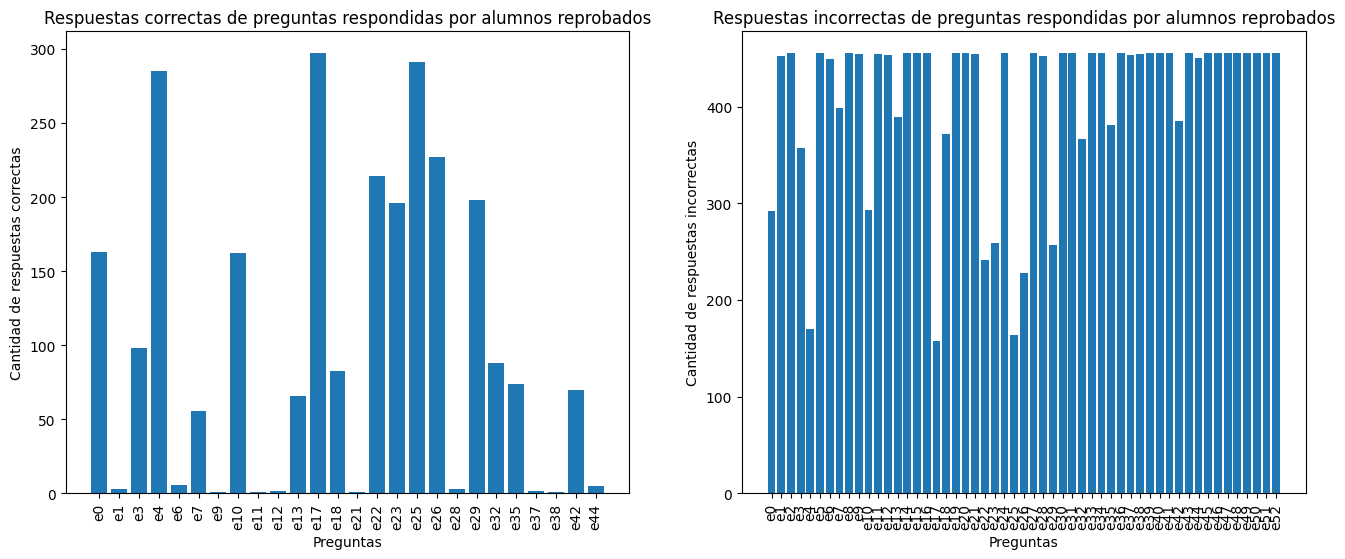

In [11]:
# Filtrar los datos para incluir solo los alumnos reprobados
reprobados = df[df['aprobado'] == 0]

# Contar la cantidad de veces que cada pregunta fue respondida correctamente e incorrectamente por los alumnos reprobados
preguntas_correctas = reprobados.loc[:, 'e0':'e52'].sum()
preguntas_incorrectas = (reprobados.loc[:, 'e0':'e52'] == 0).sum()

# Filtrar las preguntas que fueron respondidas correctamente e incorrectamente al menos una vez
preguntas_respondidas_correctas = preguntas_correctas[preguntas_correctas > 0]
preguntas_respondidas_incorrectas = preguntas_incorrectas[preguntas_incorrectas > 0]

# Configurar el tamaño de la figura
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Generar el gráfico de barras para las preguntas respondidas correctamente
axs[0].bar(preguntas_respondidas_correctas.index, preguntas_respondidas_correctas.values)
axs[0].set_xticklabels(preguntas_respondidas_correctas.index, rotation=90)
axs[0].set_xlabel('Preguntas')
axs[0].set_ylabel('Cantidad de respuestas correctas')
axs[0].set_title('Respuestas correctas de preguntas respondidas por alumnos reprobados')

# Generar el gráfico de barras para las preguntas respondidas incorrectamente
axs[1].bar(preguntas_respondidas_incorrectas.index, preguntas_respondidas_incorrectas.values)
axs[1].set_xticklabels(preguntas_respondidas_incorrectas.index, rotation=90)
axs[1].set_xlabel('Preguntas')
axs[1].set_ylabel('Cantidad de respuestas incorrectas')
axs[1].set_title('Respuestas incorrectas de preguntas respondidas por alumnos reprobados')

# Mostrar el gráfico
plt.show()

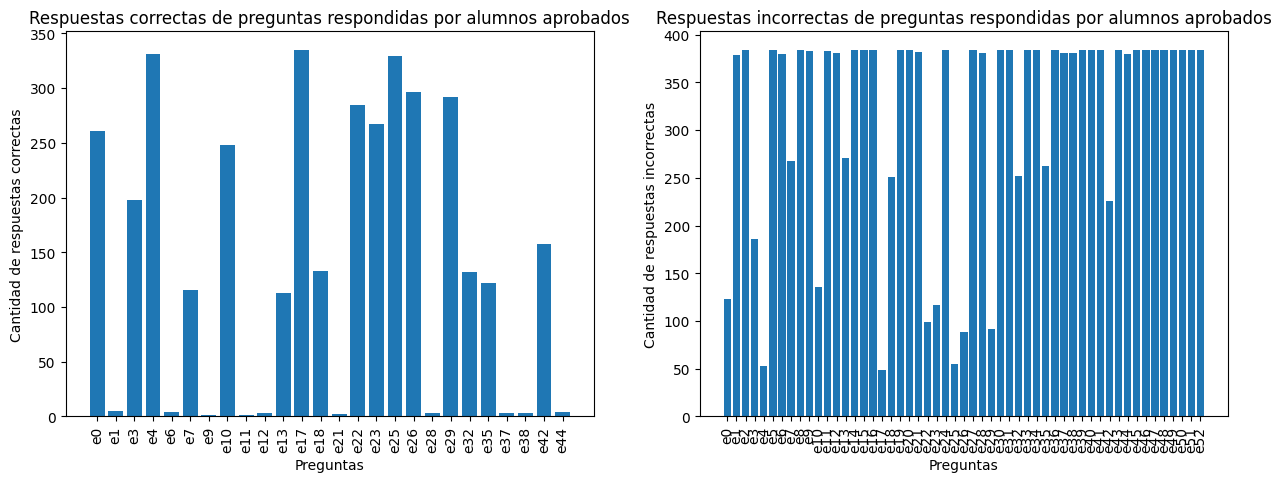

In [12]:
# Filtrar los datos para incluir solo los alumnos aprobados
aprobados = df[df['aprobado'] == 1]

# Contar la cantidad de veces que cada pregunta fue respondida correctamente por los alumnos aprobados
preguntas_correctas = aprobados.loc[:, 'e0':'e52'].sum()

# Contar la cantidad de veces que cada pregunta fue respondida incorrectamente por los alumnos aprobados
preguntas_incorrectas = (aprobados.loc[:, 'e0':'e52'] == 0).sum()

# Filtrar las preguntas que fueron respondidas correctamente o incorrectamente al menos una vez
preguntas_respondidas_correctas = preguntas_correctas[preguntas_correctas > 0]
preguntas_respondidas_incorrectas = preguntas_incorrectas[preguntas_incorrectas > 0]

# Crear una figura con dos gráficos uno al lado del otro
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Generar el gráfico de barras de las respuestas correctas
axs[0].bar(preguntas_respondidas_correctas.index, preguntas_respondidas_correctas.values)
axs[0].set_xticklabels(preguntas_respondidas_correctas.index, rotation=90)
axs[0].set_xlabel('Preguntas')
axs[0].set_ylabel('Cantidad de respuestas correctas')
axs[0].set_title('Respuestas correctas de preguntas respondidas por alumnos aprobados')

# Generar el gráfico de barras de las respuestas incorrectas
axs[1].bar(preguntas_respondidas_incorrectas.index, preguntas_respondidas_incorrectas.values)
axs[1].set_xticklabels(preguntas_respondidas_incorrectas.index, rotation=90)
axs[1].set_xlabel('Preguntas')
axs[1].set_ylabel('Cantidad de respuestas incorrectas')
axs[1].set_title('Respuestas incorrectas de preguntas respondidas por alumnos aprobados')

# Mostrar la figura
plt.show()


Realizando el Analisis de la estructura del dataFrame para obtener el adjmat de este.

In [13]:
DAG = bn.structure_learning.fit(df)
print(DAG['adjmat'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
target    exitosos  fallidos  envios     e0     e1     e2     e3     e4  \
source                                                                    
exitosos     False     False   False  False  False  False   True   True   
fallidos     False     False   False  False  False  False  False  False   
envios       False     False   False  False  False  False  False  False   
e0            True      True   False  False  False  False  False  False   
e1           False     False   False  False  False  False  False  False   
e2           False     False   False  False  False  False  False  False   
e3           False     False   False  False  False  False  False  False   
e4           False     False   False  False  False  False  False  False   
e5           False     False   False  False  False  False  False  

Revisando el DAG con una grafica simple del modelo bayesiano.

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


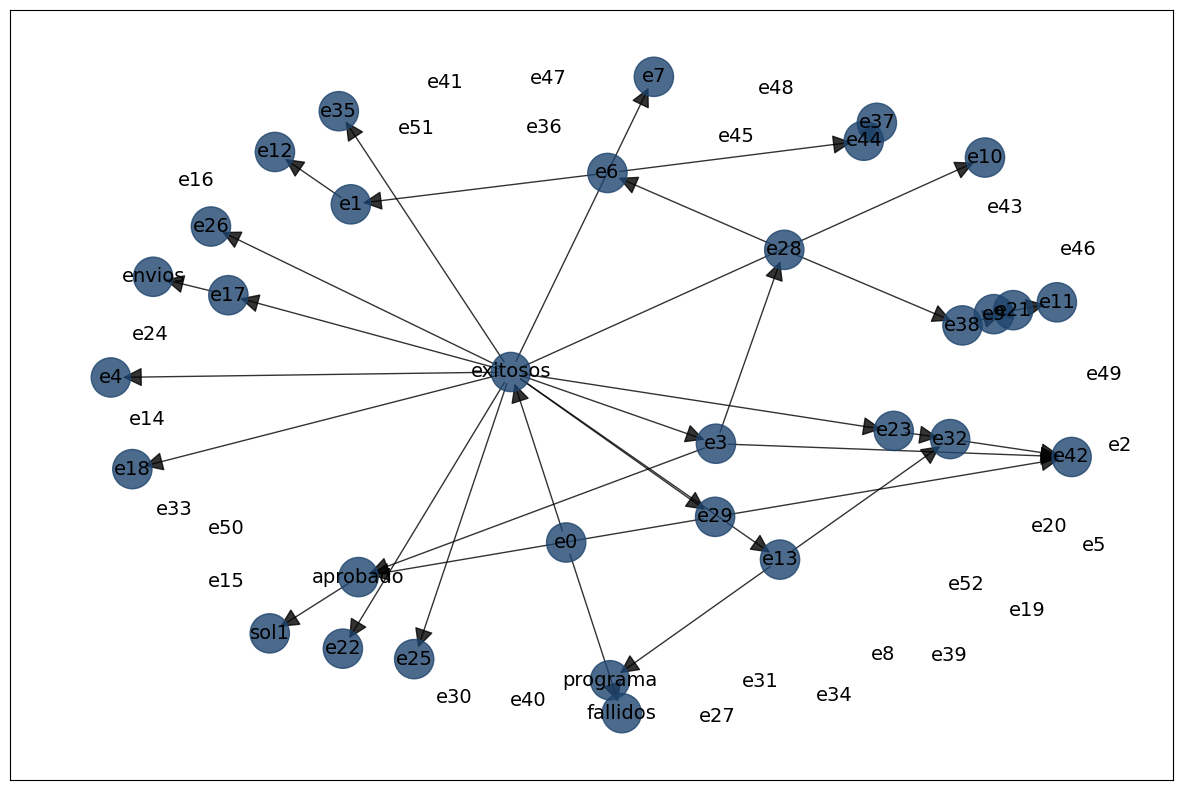

In [14]:
G = bn.plot(DAG)

Generando un test independiente.

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


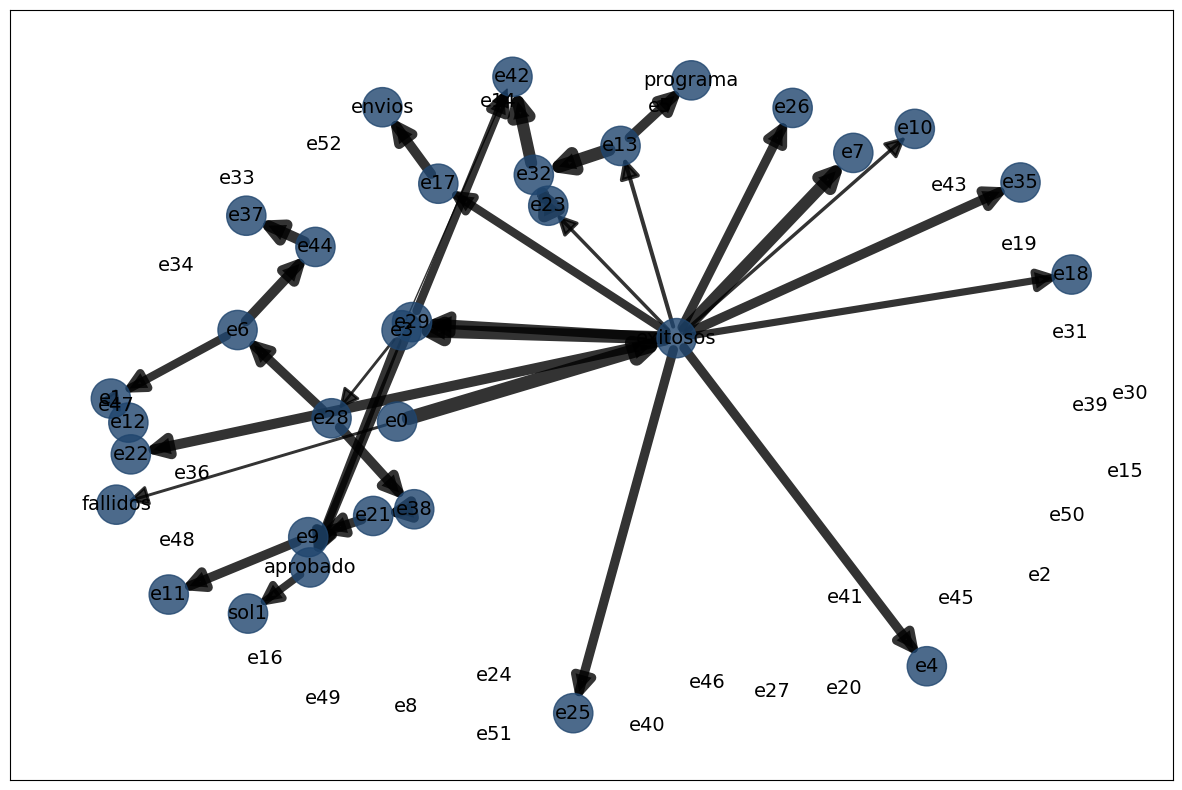

In [15]:
model = bn.structure_learning.fit(df)
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

utilizando HC y BIC en el modelo.

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


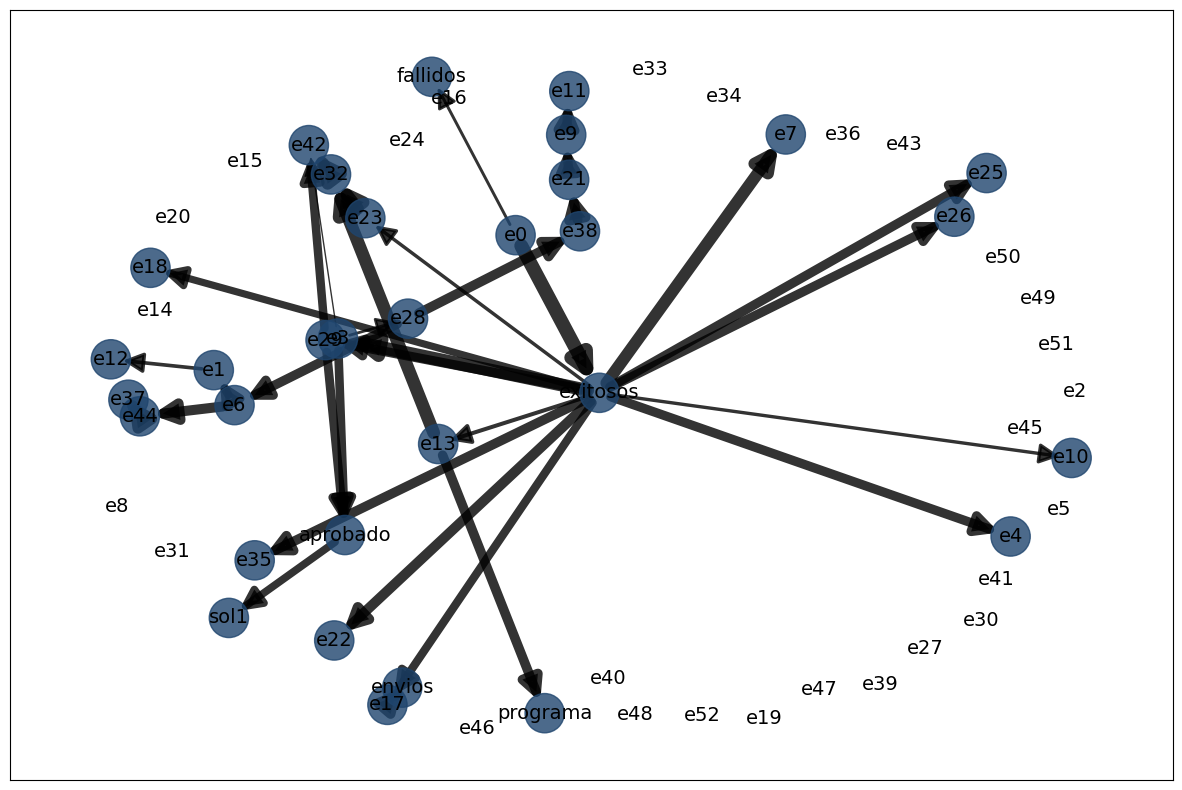

In [16]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_bic = bn.independence_test(model_hc_bic, df)
G = bn.plot(model_hc_bic)

realizando el analisis de bayes.

In [17]:
# Ajustar los parámetros de la red bayesiana
model_bayes = bn.parameter_learning.fit(model_hc_bic, df, methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of exitosos:
+--------------+----------------------+----------------------+
| e0           | e0(0)                | e0(1)                |
+--------------+----------------------+----------------------+
| exitosos(0)  | 0.212816691505216    | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(1)  | 0.03467461500248384  | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(2)  | 0.04123199205166417  | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(3)  | 0.056532538499751595 | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(4)  | 0.055439642324888204 | 0.02459661550570641  |
+--------------+------

Realizando inferancia

In [1]:
# Realizar inferencias en la red bayesiana
evidence= {
    'e0':1,
    'e1':1,
    # 'e2':0,
    'e3':1, 
    'e4':1, 
    # 'e5':0, 
    'e6':1, 
    'e7':1, 
    # 'e8':0, 
    'e9':1, 
    'e10':1,
    'e11':1, 
    'e12':1, 
    'e13':1, 
    # 'e14':0, 
    # 'e15':0, 
    # 'e16':0, 
    'e17':1, 
    'e18':1, 
    # 'e19':0, 
    # 'e20':0,
    'e21':1, 
    'e22':1, 
    'e23':1, 
    # 'e24':0, 
    'e25':1, 
    'e26':1, 
    # 'e27':0, 
    'e28':1, 
    'e29':1, 
    # 'e30':0,
    # 'e31':0, 
    'e32':1, 
    # 'e33':0, 
    # 'e34':0, 
    'e35':1, 
    # 'e36':0, 
    'e37':1, 
    'e38':1, 
    # 'e39':0, 
    # 'e40':0,
    # 'e41':0, 
    'e42':1, 
    # 'e43':0, 
    'e44':1, 
    # 'e45':0, 
    # 'e46':0, 
    # 'e47':0, 
    # 'e48':0, 
    # 'e49':0, 
    # 'e50':0,
    # 'e51':0, 
    # 'e52':0,
    # 'sol1':7,
}
prediccion = bn.inference.fit(model_bayes, variables=['aprobado'], evidence=evidence)
print(prediccion)


NameError: name 'bn' is not defined